# Generating intermodal graph and calculating adjacency matrix

In [1]:
import os
import geopandas as gpd

data_path = "./data"

## GraphGenerator

In [2]:
from blocksnet import GraphGenerator

blocks = gpd.read_parquet(os.path.join(data_path, 'blocks.parquet'))
gg = GraphGenerator(blocks)
graph = gg.run('drive')

/home/vasilstar/masterplanning/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Graph made for 'drive' network type


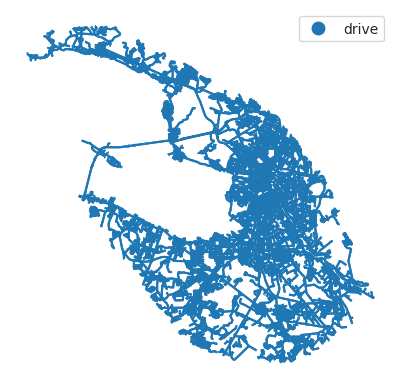

In [3]:
GraphGenerator.plot(graph)

## AdjacencyCalculator

In [4]:
from blocksnet import AdjacencyCalculator

ac = AdjacencyCalculator(blocks, graph)
adj_mx = ac.run()
adj_mx.head()

,0,1,2,3,4,5,6,7,8,9,...,16310,16311,16312,16313,16314,16315,16316,16317,16318,16319
0,0.0,7.4,3.9,4.2,10.3,10.3,10.6,7.6,59.8,59.8,...,65.1,91.2,78.9,111.5,121.1,113.3,187.5,186.6,187.5,66.6
1,6.8,0.0,7.1,2.6,6.6,9.7,8.7,5.7,62.9,62.9,...,68.2,94.3,82.0,114.6,124.2,116.4,190.6,189.7,190.6,66.0
2,3.9,7.8,0.0,5.7,9.8,6.4,8.8,5.8,55.9,55.9,...,61.2,87.3,75.0,107.6,117.2,109.4,183.6,182.7,183.6,62.7
3,4.2,3.2,6.5,0.0,6.1,9.1,8.1,5.1,62.3,62.3,...,67.6,93.7,81.4,114.0,123.6,115.8,190.0,189.1,190.0,65.4
4,9.6,6.6,7.4,6.0,0.0,8.9,5.2,2.2,63.1,63.1,...,68.4,94.5,82.2,114.8,124.4,116.6,190.8,189.9,190.8,64.1


In [6]:
adj_mx.to_pickle(os.path.join(data_path, 'adj_mx.pickle'))